## Clustering and Visualization

In [1]:
### Loading in packages

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
### Reading in data. Our data is stored in a dataframe called 'df'.

df = pd.read_csv('Alignment-HitTable.csv', header = None)
df.columns = ['query acc.verr', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 
             'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
df.head()

,query acc.verr,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,MN997409.1,MN997409.1,100.00,29882,0,0,1,29882,1,29882,0.0,55182
1,MN997409.1,MT020881.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MT020880.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN985325.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,MN975262.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166


In [3]:
## Part A (10 pts):

## Use the .describe() method to analyze the dataframe. Store the results in a new dataframe called 'results'.

results = df.describe()

In [4]:
## Part B (10 pts):

## Store the correlation of the dataframe in a variable called 'corr'.

corr = df.corr()

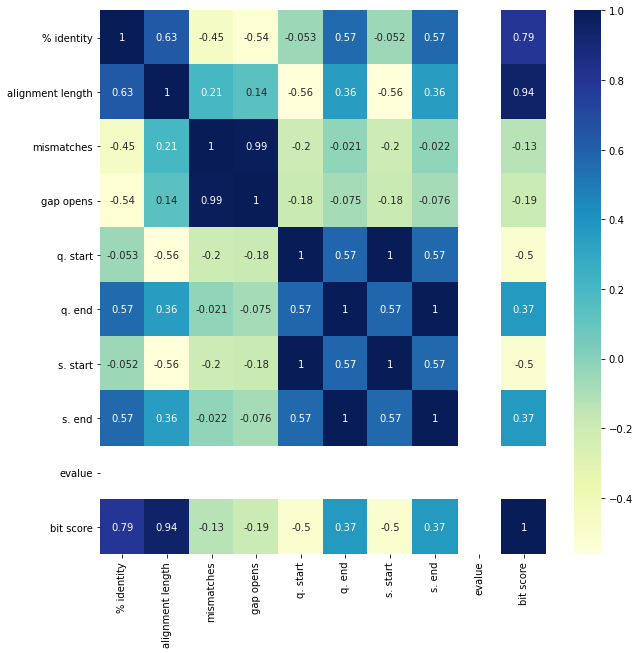

In [5]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.show()

In [6]:
## Part C (30 pts)

## Perform PCA with 2 components on the numeric columns of the datafame. Fit the PCA in a variable called 'pca'.

df_numeric = df[['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end',
        's. start', 's. end', 'evalue', 'bit score']]

pca = PCA(n_components=2)
pca.fit(df_numeric);

In [7]:
### Part D (25 pts)

## Store the components of the PCA in a dataframe called 'components'. Name the index as ['Component 1', 'Component 2'].

components = pd.DataFrame(pca.components_)

components.columns = ['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end',
        's. start', 's. end', 'evalue', 'bit score']

components.index = ['Component 1', 'Component 2']

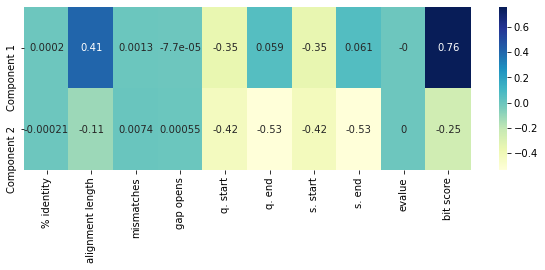

In [8]:
fig, ax = plt.subplots(figsize = (10,3))
sns.heatmap(components, annot = True, cmap = 'YlGnBu')
plt.show()

In [9]:
### Part E (25 pts)

## Fit a K-Means clustering algorithm on the numeric data with 2 clusters and a random state of 0.
## Store the predicted groups in a variable called 'y_pred'

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_numeric)
y_pred = kmeans.predict(df_numeric)

<AxesSubplot:>

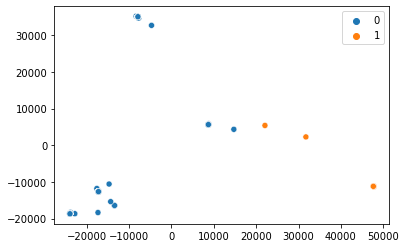

In [10]:
sns.scatterplot(x= pca.transform(df_numeric)[:, 0], y = pca.transform(df_numeric)[:, 1], hue = y_pred)